In [1]:
from call_for_data import make_master_dataframe
from gps_coords_to_call import convert_location_to_gps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# gps = "(39.29088, -76.61076)"
# listgps = list(gps.replace("(", "").replace(")", "").split(","))
# listgps[0] = float(listgps[0])
# listgps[1] = float(listgps[1])
# tuplegps = tuple(listgps)

In [3]:
location = "baltimore"
month = 3
day = 7

In [4]:
gps = convert_location_to_gps(location)
gps
type(gps)

tuple

In [5]:
loc = gps
df1 = make_master_dataframe(loc, month, day)


In [6]:
test_frame = df1
test_frame

,date,temperature_2m,precipitation,cloud_cover,wind_speed_100m
0,2025-02-28 05:00:00,44.869999,0.0,0.0,25.501621
1,2025-02-28 06:00:00,42.980000,0.0,0.0,25.560633
2,2025-02-28 07:00:00,41.629997,0.0,1.0,25.540344
3,2025-02-28 08:00:00,41.540001,0.0,2.0,30.606880
4,2025-02-28 09:00:00,40.910000,0.0,1.0,32.464931
...,...,...,...,...,...
355,1981-03-15 00:00:00,33.935902,0.0,0.0,31.763750
356,1981-03-15 01:00:00,32.945900,0.0,0.0,30.953718
357,1981-03-15 02:00:00,32.225899,0.0,0.0,29.079889
358,1981-03-15 03:00:00,31.595900,0.0,0.0,26.089447


In [7]:
# step 1 should be to convert UTC to local time
# step 2 should be to split the day from the hour
# step 3 should be groupby hour - should result in 24 groups
# step 4 should be analysis of the group data
#we should probably use boolean to evaluate the chance of rain or clouds

In [8]:
# step 1 - converting to local time
test_frame['local'] = test_frame['date'].dt.tz_localize('utc').dt.tz_convert('America/Chicago')
test_frame = test_frame.drop('date', axis=1)

In [9]:
test_frame

,temperature_2m,precipitation,cloud_cover,wind_speed_100m,local
0,44.869999,0.0,0.0,25.501621,2025-02-27 23:00:00-06:00
1,42.980000,0.0,0.0,25.560633,2025-02-28 00:00:00-06:00
2,41.629997,0.0,1.0,25.540344,2025-02-28 01:00:00-06:00
3,41.540001,0.0,2.0,30.606880,2025-02-28 02:00:00-06:00
4,40.910000,0.0,1.0,32.464931,2025-02-28 03:00:00-06:00
...,...,...,...,...,...
355,33.935902,0.0,0.0,31.763750,1981-03-14 18:00:00-06:00
356,32.945900,0.0,0.0,30.953718,1981-03-14 19:00:00-06:00
357,32.225899,0.0,0.0,29.079889,1981-03-14 20:00:00-06:00
358,31.595900,0.0,0.0,26.089447,1981-03-14 21:00:00-06:00


In [10]:
#create a checkpoint to avoid having to restart kernel
test_frame2 = test_frame

In [11]:
#step 2 - splitting day from hour
test_frame2['Dates'] = pd.to_datetime(test_frame2['local']).dt.date
test_frame2['Time'] = pd.to_datetime(test_frame2['local']).dt.time
test_frame2 = test_frame.drop('local', axis=1)
test_frame2

,temperature_2m,precipitation,cloud_cover,wind_speed_100m,Dates,Time
0,44.869999,0.0,0.0,25.501621,2025-02-27,23:00:00
1,42.980000,0.0,0.0,25.560633,2025-02-28,00:00:00
2,41.629997,0.0,1.0,25.540344,2025-02-28,01:00:00
3,41.540001,0.0,2.0,30.606880,2025-02-28,02:00:00
4,40.910000,0.0,1.0,32.464931,2025-02-28,03:00:00
...,...,...,...,...,...,...
355,33.935902,0.0,0.0,31.763750,1981-03-14,18:00:00
356,32.945900,0.0,0.0,30.953718,1981-03-14,19:00:00
357,32.225899,0.0,0.0,29.079889,1981-03-14,20:00:00
358,31.595900,0.0,0.0,26.089447,1981-03-14,21:00:00


In [12]:
type(test_frame2['Time'])

pandas.core.series.Series

In [13]:
def localize_dataframe(dataframe):
    """
    Takes a dataframe, converts times to local, then groups by hour for analysis
    :param dataframe:
    :return:
    """
    dataframe['local'] = dataframe['date'].dt.tz_localize('utc').dt.tz_convert('America/Chicago')
    dataframe = dataframe.drop('date', axis=1)
    dataframe['Dates'] = pd.to_datetime(dataframe['local']).dt.date
    dataframe['Time'] = pd.to_datetime(dataframe['local']).dt.time
    dataframe = dataframe.drop('local', axis=1)
    return dataframe

In [14]:
workable_data = localize_dataframe(df1)
workable_data

,temperature_2m,precipitation,cloud_cover,wind_speed_100m,Dates,Time
0,44.869999,0.0,0.0,25.501621,2025-02-27,23:00:00
1,42.980000,0.0,0.0,25.560633,2025-02-28,00:00:00
2,41.629997,0.0,1.0,25.540344,2025-02-28,01:00:00
3,41.540001,0.0,2.0,30.606880,2025-02-28,02:00:00
4,40.910000,0.0,1.0,32.464931,2025-02-28,03:00:00
...,...,...,...,...,...,...
355,33.935902,0.0,0.0,31.763750,1981-03-14,18:00:00
356,32.945900,0.0,0.0,30.953718,1981-03-14,19:00:00
357,32.225899,0.0,0.0,29.079889,1981-03-14,20:00:00
358,31.595900,0.0,0.0,26.089447,1981-03-14,21:00:00


<Axes: xlabel='Time', ylabel='temperature_2m'>

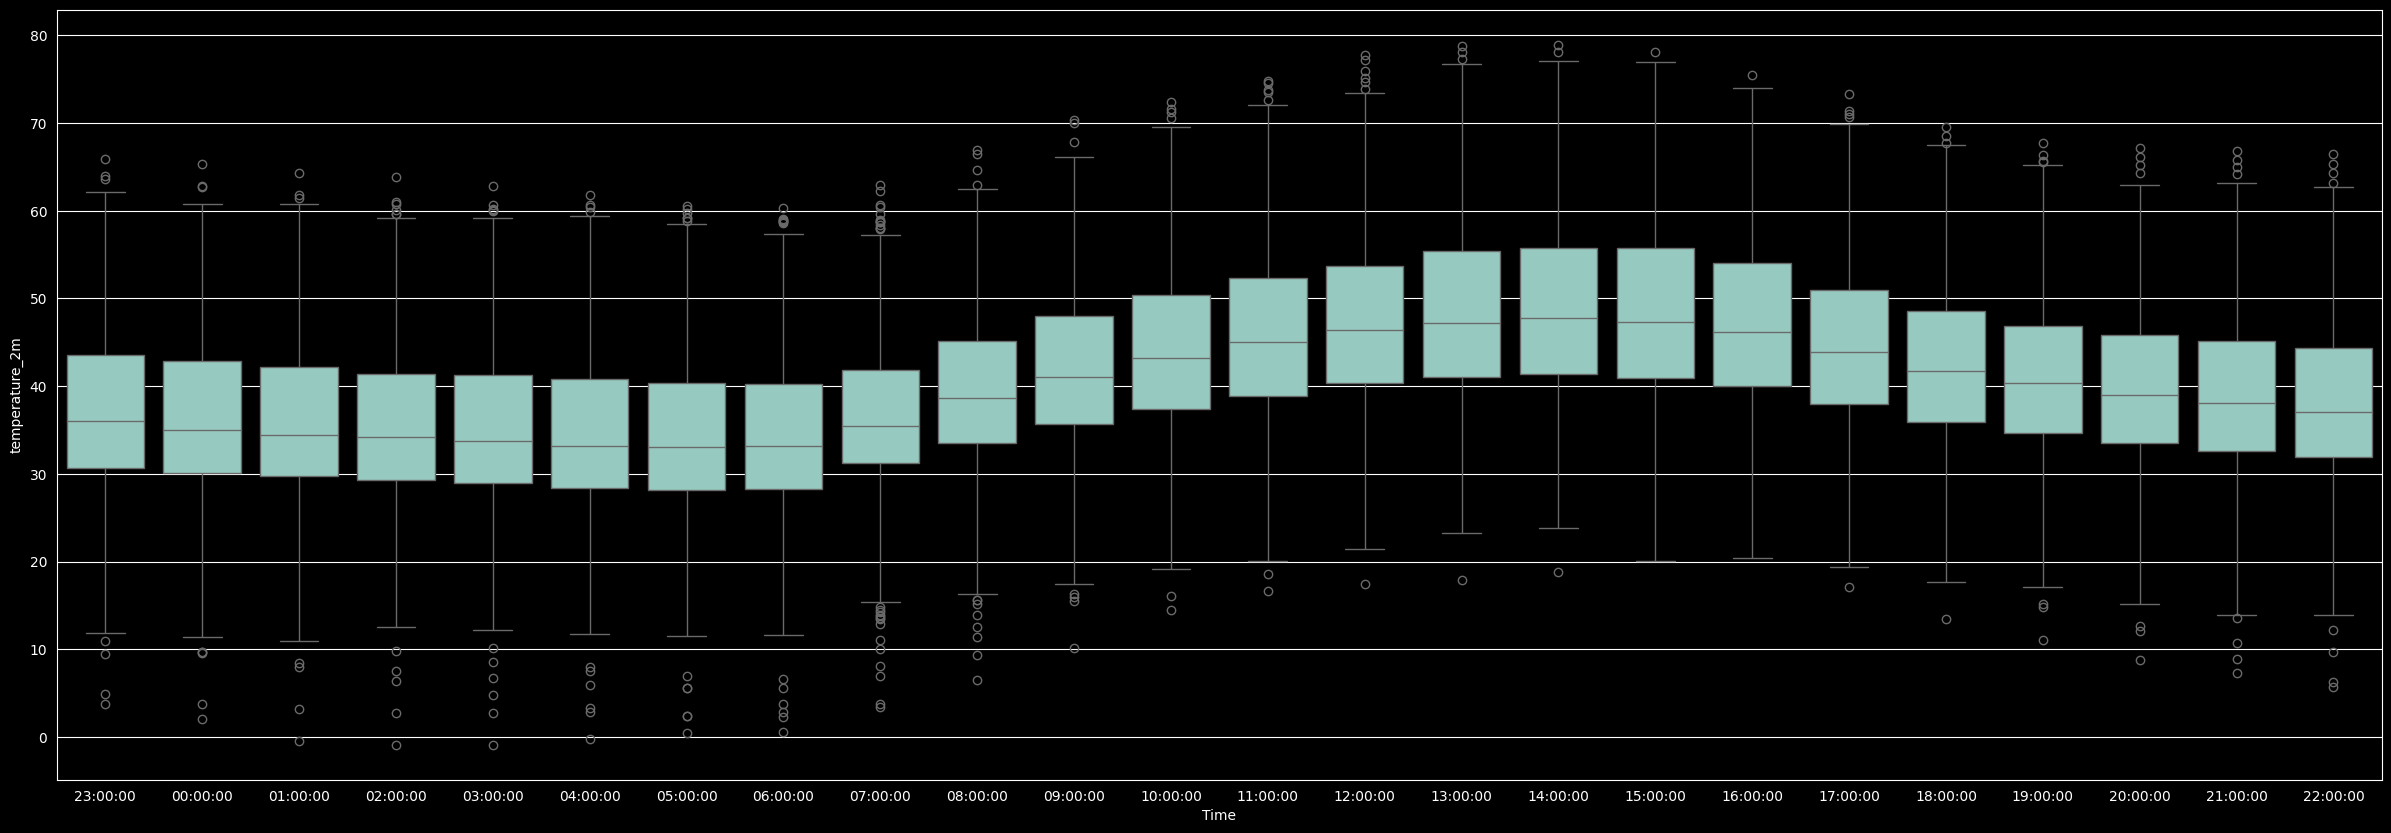

In [15]:
plt.figure(figsize=(30,10))
sns.boxplot(test_frame2, x=test_frame2['Time'], y=test_frame2['temperature_2m'])


In [16]:
#step 3, group by hour
time_groups = test_frame.groupby('Time')

In [17]:
#step 4 analysis of data by hour
summary = time_groups.describe()

In [18]:
summary_plottable = summary['temperature_2m'].drop('count', axis=1)

In [19]:
summary_plottable

,mean,std,min,25%,50%,75%,max
Time,,,,,,,
00:00:00,36.297920,9.587831,2.075903,30.065901,35.015900,42.912949,65.345901
01:00:00,35.894455,9.557404,-0.444099,29.705900,34.475899,42.237951,64.355896
02:00:00,35.323593,9.578666,-0.894100,29.345900,34.205898,41.382501,63.905899
03:00:00,34.908321,9.570292,-0.894100,28.985901,33.755901,41.292950,62.825905
04:00:00,34.456188,9.500740,-0.264099,28.422950,33.215900,40.820000,61.745903
05:00:00,34.092056,9.479151,0.455898,28.175900,33.035900,40.392952,60.575901
06:00:00,34.145653,9.382922,0.545902,28.265900,33.125900,40.235901,60.305901
07:00:00,36.283253,9.207546,3.425900,31.212951,35.465900,41.877951,62.959999
08:00:00,39.144184,9.342609,6.485899,33.485901,38.660000,45.185898,66.965904


<Axes: xlabel='Time'>

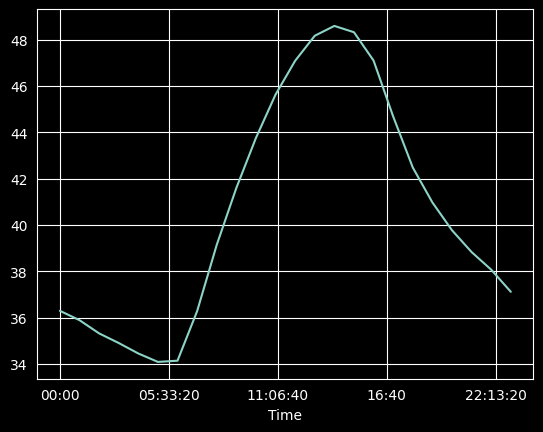

In [20]:
summary_plottable['mean'].plot()

In [21]:

#the first thing we should do is group the data by period of day
#currently there is an hourly breakdown - lets take each hour and assign to a group:
# wee hours 00:00-5:00
# morning: 5:00 - 12:00
# afternoon: 12:00-17:00
# evening: 17:00-20:00
# night: 20:00-24:00

In [22]:
hour_to_filter = 12
filtered_rows = df1[df1['date'].dt.hour == hour_to_filter]

In [23]:
filtered_rows["temperature_2m"].mean()

np.float32(34.23445)

In [24]:
filtered_rows["temperature_2m"].median()

np.float32(33.17)

In [25]:
filtered_rows["temperature_2m"].min()

np.float32(0.54590225)

In [26]:
filtered_rows["temperature_2m"].max()

np.float32(60.3059)

In [27]:
#can we generate a bell curve?

In [28]:
hours = range(0, 24)
output_dict = {}
for hour in hours:
    hour_to_eval = hour
    filtered_rows = df1[df1['date'].dt.hour == hour_to_eval]
    hour_min = filtered_rows["temperature_2m"].min()
    hour_mean = filtered_rows["temperature_2m"].mean()
    hour_median = filtered_rows["temperature_2m"].median()
    hour_max = filtered_rows["temperature_2m"].max()
    output_dict[hour_to_eval] = (hour_min, hour_mean, hour_median, hour_max)

In [29]:
output_dict

{0: (np.float32(13.415899),
  np.float32(42.17819),
  np.float32(41.6759),
  np.float32(69.53)),
 1: (np.float32(11.075901),
  np.float32(40.827652),
  np.float32(40.325897),
  np.float32(67.6859)),
 2: (np.float32(8.735899),
  np.float32(39.62165),
  np.float32(38.8859),
  np.float32(67.145905)),
 3: (np.float32(7.2959003),
  np.float32(38.70752),
  np.float32(37.8959),
  np.float32(66.785904)),
 4: (np.float32(5.6758995),
  np.float32(37.960583),
  np.float32(36.9959),
  np.float32(66.5159)),
 5: (np.float32(3.6959019),
  np.float32(36.85712),
  np.float32(35.7359),
  np.float32(65.8859)),
 6: (np.float32(2.075903),
  np.float32(36.22672),
  np.float32(35.0159),
  np.float32(65.3459)),
 7: (np.float32(-0.44409943),
  np.float32(35.865788),
  np.float32(34.5659),
  np.float32(64.355896)),
 8: (np.float32(-0.8941002),
  np.float32(35.316586),
  np.float32(34.2059),
  np.float32(63.9059)),
 9: (np.float32(-0.8941002),
  np.float32(34.834457),
  np.float32(33.6659),
  np.float32(62.82590